In [1]:
import numpy as np
import copy
from matplotlib import pyplot as plt

In [2]:
rng = np.random.default_rng()

In [3]:
def eigenvalue_distribution(disType,n):
    if disType == 'power':
        eigen = rng.exponential(1,n)
    elif disType == 'linear':
        eigen = np.linspace(0.1,1000,n)+0.0001*np.random.rand(n)
    elif disType == 'topheavy':
        eigen = np.linspace(0.1,1000,n)+0.0001*np.random.rand(n)
        k = rng.integers(n//4,n//2,size=1)
        for i in range(k[0]):
            eigen[i]=1000
    elif disType == 'botheavy':
        eigen = np.linspace(0.1,1000,n)+0.0001*np.random.rand(n)
        k = rng.integers(n//4,n//2,size=1)
        for i in range(k[0]):
            eigen[-(i+1)]=0.1
    eigen[::-1].sort()
    eigen[0]=1000
    eigen[-1]=0.1
    return eigen

In [4]:
n = 200
rng = np.random.default_rng()
eigen = eigenvalue_distribution('linear',n)
A = np.diag(eigen)
x_0 = np.random.rand(n)
L = eigen[0]

In [5]:
def U(x,p):
    res =0
    for i in range(n):
        res += (x[i]**2)*(eigen[i]**p)
    return res

In [6]:
def S(x,p):
    return U(x,p)/U(x,p+1)

In [7]:
def GD(x0,A,niters):
    x = np.copy(x0)
    residual = []
    for i in range(niters):
        x=x-(1/L)*A@x
        residual.append(U(x,0))
    return residual

In [8]:
def Polyak(x0,A,niters):
    x = np.copy(x0)
    residual = []
    for i in range(niters):
        x=x-S(x,1)*A@x
        residual.append(U(x,0))
    return residual

In [9]:
def Hacky1(x0,A,niters):
    x = np.copy(x0)
    residual = []
    for i in range(niters):
        #p = np.random.choice([1,3],1)
        p=3
        x= x -S(x,p)*A@x
        residual.append(U(x,0))
    return residual

In [10]:
def Hacky2step(x0,A,niters):
    x = np.copy(x0)
    residual = []
    for i in range(niters):
        U1 = U(x,1)
        U2 = U(x,2)
        U3 = U(x,3)
        U4 = U(x,4)
        step_size_optimal = (U1*U4-U2*U3-((U1**2)*(U4**2)-6*U1*U2*U3*U4+4*U1*(U3**3)+4*(U2**3)*U4-3*(U2**2)*(U3**2))**0.5)/(2*U2*U4-U3**2)
        x = x - step_size_optimal*A@x
        residual.append(U(x,0))
        x= x -S(x,1)*A@x
        residual.append(U(x,0))
    return residual

In [11]:
niters= 1000
ansGD = GD(x_0,A,niters)
ansPolyak = Polyak(x_0,A,niters)
ansHacky1 = Hacky1(x_0,A,niters)
ans2step = Hacky2step(x_0,A,niters//2)

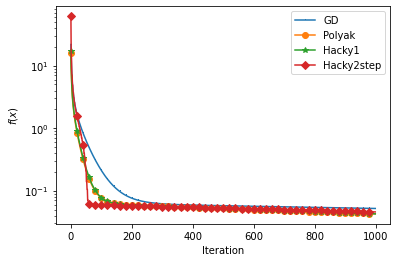

In [12]:
val = [ansGD,ansPolyak,ansHacky1,ans2step ]
labels = ['GD','Polyak','Hacky1','Hacky2step']
markers = [',', 'o', '*',  'D']
for i in range(len(val)):
    plt.plot(val[i],label = labels[i],
        marker=markers[i], markevery=20)
plt.yscale('log')
plt.xlabel(u'Iteration')
plt.ylabel(r'$f(x)$')
plt.legend()